# Exploratory Analysis

In [2]:
%pylab inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


## Read store information

In [3]:
store = pd.read_csv("../data/store.csv")
store.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270,9,2008,0,NaN,NaN,NaN
1,2,a,a,570,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,a,a,14130,12,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,c,c,620,9,2009,0,NaN,NaN,NaN
4,5,a,a,29910,4,2015,0,NaN,NaN,NaN


## Read train data

In [5]:
train = pd.read_csv("../data/train.csv", dtype={'StateHoliday': str}, parse_dates=["Date"])
train = train.loc[train.Sales > 0]
train['month'] = train['Date'].dt.month
train['day'] = train['Date'].dt.day
columns = ['Store', 'DayOfWeek', 'Promo', 'month', 'day']
sales = train['Sales']
print("Train set size: %d" % len(train))
print("Mean: %f, std: %f" % (sales.mean(), sales.std()))
train.head(5)

Train set size: 844338
Mean: 6955.959134, std: 3103.815515


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,month,day
0,1,5,2015-07-31,5263,555,1,1,0,1,7,31
1,2,5,2015-07-31,6064,625,1,1,0,1,7,31
2,3,5,2015-07-31,8314,821,1,1,0,1,7,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,7,31
4,5,5,2015-07-31,4822,559,1,1,0,1,7,31


StateHoliday has non numeric values.
  * a = public holiday
  * b = Easter holiday
  * c = Christmas
  * 0 = None

## Read test data

In [10]:
test = pd.read_csv("../data/test.csv", dtype={'StateHoliday': str})
test.head(5)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1,1,0,0
1,2,3,4,2015-09-17,1,1,0,0
2,3,7,4,2015-09-17,1,1,0,0
3,4,8,4,2015-09-17,1,1,0,0
4,5,9,4,2015-09-17,1,1,0,0


## Sales by day of week

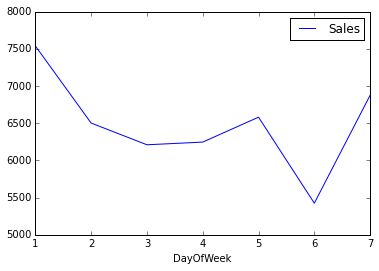

In [6]:
df = train[['DayOfWeek', 'Sales']].groupby('DayOfWeek').median()
df.plot()

## PCA

In [7]:
A = train[columns]
U, s, V = np.linalg.svd(A, full_matrices=False)
print("Eigenvalues: %s" % str(s))

Eigenvalues: [  1.92201830e+06   2.84636427e+05   7.97893721e+03   3.05499500e+03
   1.58931780e+03   4.31905048e+02]
